In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np  
from config import sales_fix_path
import warnings
from src.analysis.visualization import barplots, lineplots, tsplot, series_decompose
from pandas.plotting import autocorrelation_plot

warnings.filterwarnings("ignore")

In [2]:
sales = pd.read_csv(sales_fix_path)

In [3]:
sales['date'] = pd.to_datetime(sales['date'], format='%d.%m.%Y')
sales["Year"] = sales["date"].dt.year
sales["Month"] = sales["date"].dt.month
sales["Day"] = sales["date"].dt.day

In [4]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,revenue,Year,Month,Day
0,2013-01-02,0,59,22154,999.00,1.0,999.00,2013,1,2
1,2013-01-03,0,25,2552,899.00,1.0,899.00,2013,1,3
2,2013-01-06,0,25,2554,1709.05,1.0,1709.05,2013,1,6
3,2013-01-15,0,25,2555,1099.00,1.0,1099.00,2013,1,15
4,2013-01-10,0,25,2564,349.00,1.0,349.00,2013,1,10
...,...,...,...,...,...,...,...,...,...,...
2595779,2015-10-10,33,25,7409,299.00,1.0,299.00,2015,10,10
2595780,2015-10-09,33,25,7460,299.00,1.0,299.00,2015,10,9
2595781,2015-10-14,33,25,7459,349.00,1.0,349.00,2015,10,14
2595782,2015-10-22,33,25,7440,299.00,1.0,299.00,2015,10,22


<font size = 3>

**Distribution shops and sold count items for all the time :**


</font>

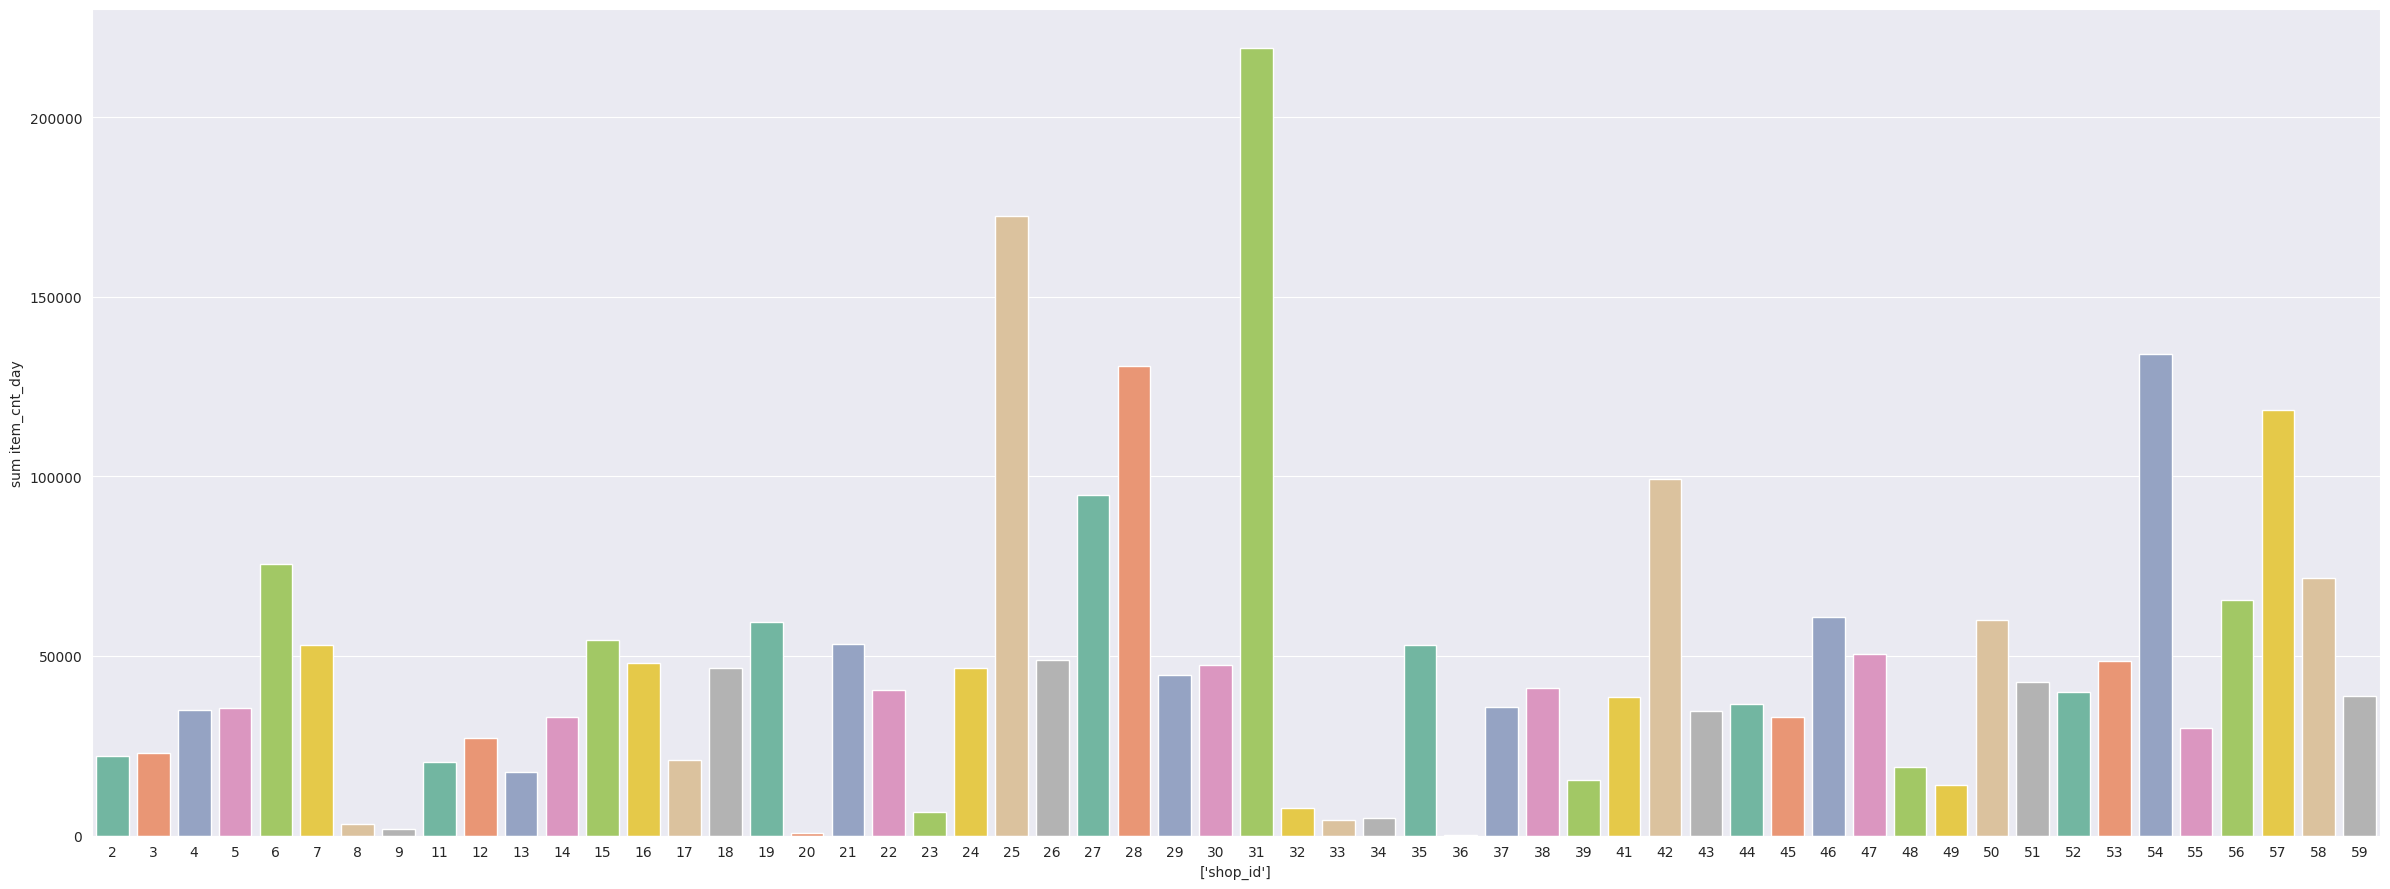

In [5]:
barplots(data=sales, group_column=['shop_id'], agg_column='item_cnt_day',
         x='shop_id', y='item_cnt_day', agg_func=['sum'])

<font size = 3>

**As we can see not at all shops have high sales, Some of them, for example shop with id 31 has extreme numer sales, but shop with id 36 has almost no sales**


</font>

<font size = 3>

**Distribution of the sum and mean revenue per month:**


</font>

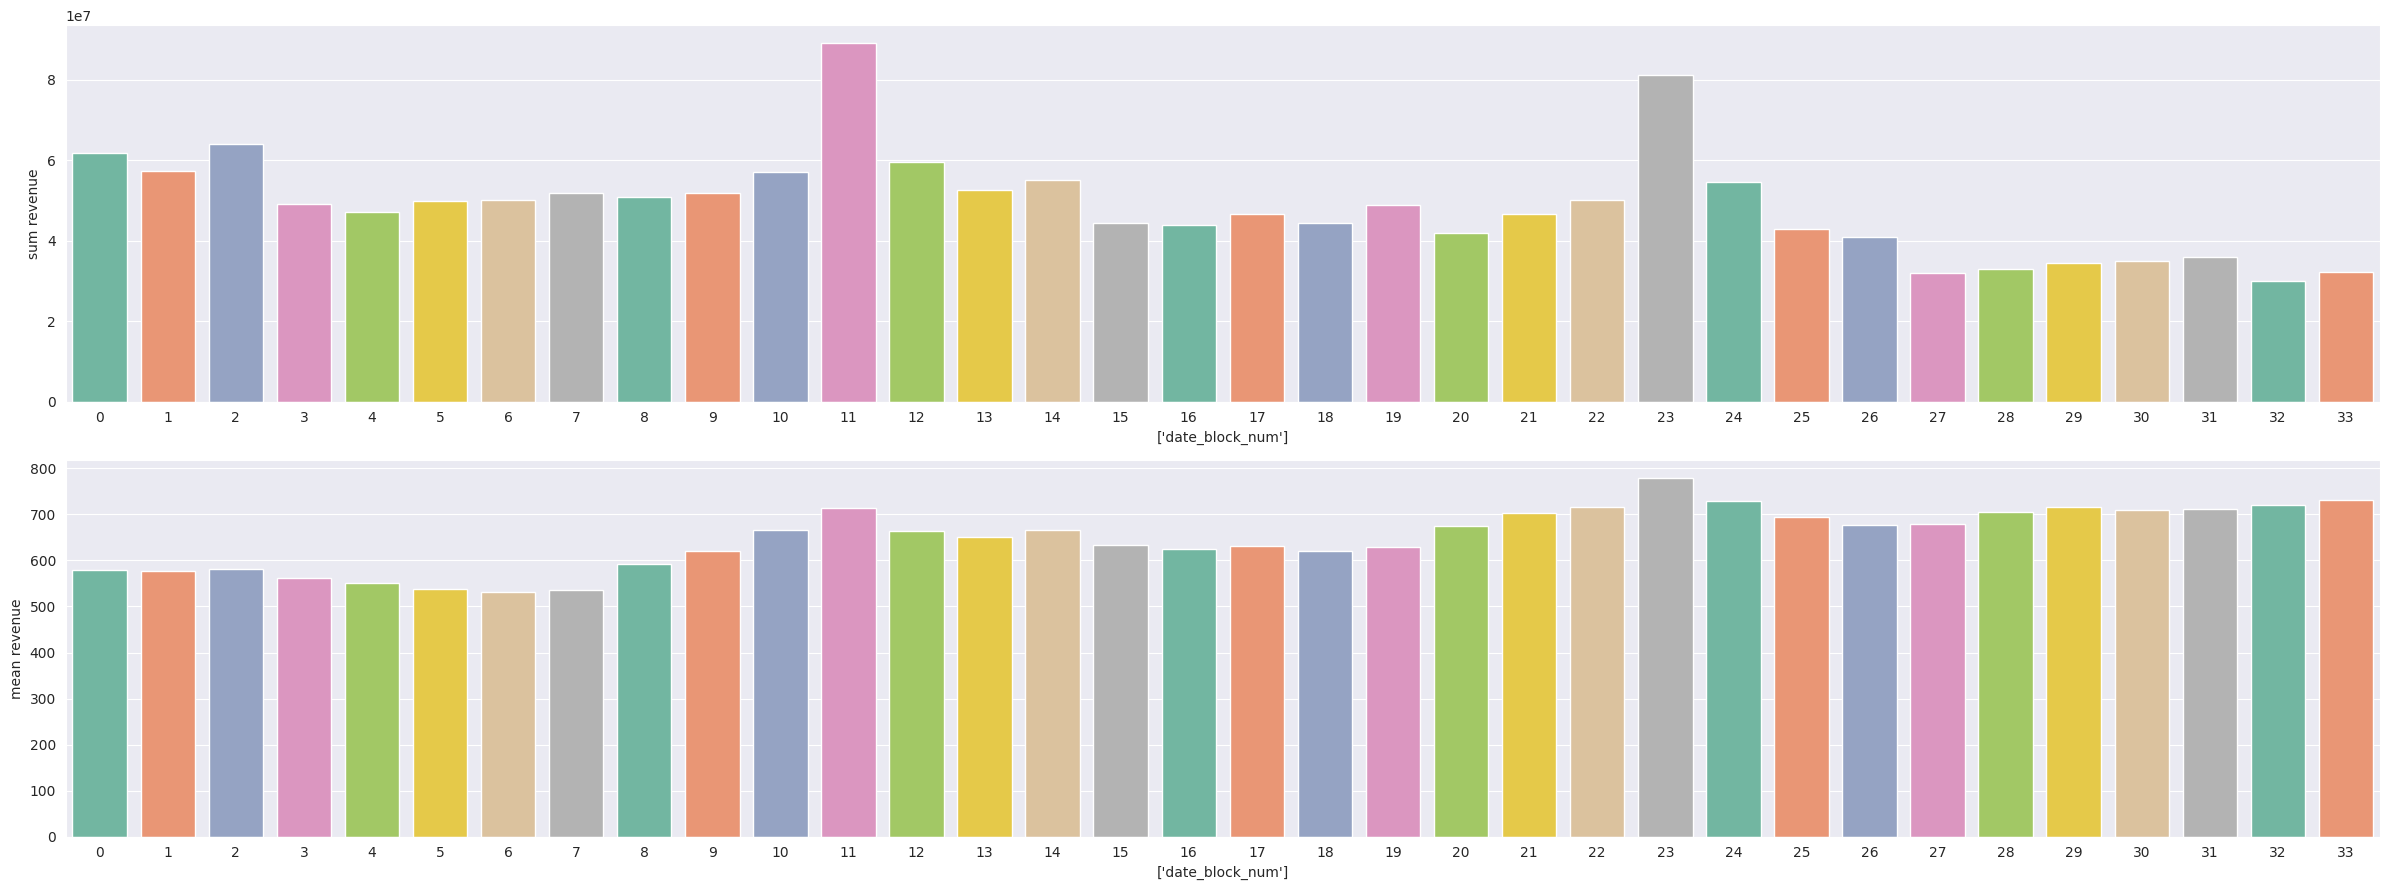

In [6]:
barplots(data=sales, group_column=['date_block_num'], agg_column='revenue',
         x='date_block_num', y='revenue', agg_func=['sum', 'mean'])

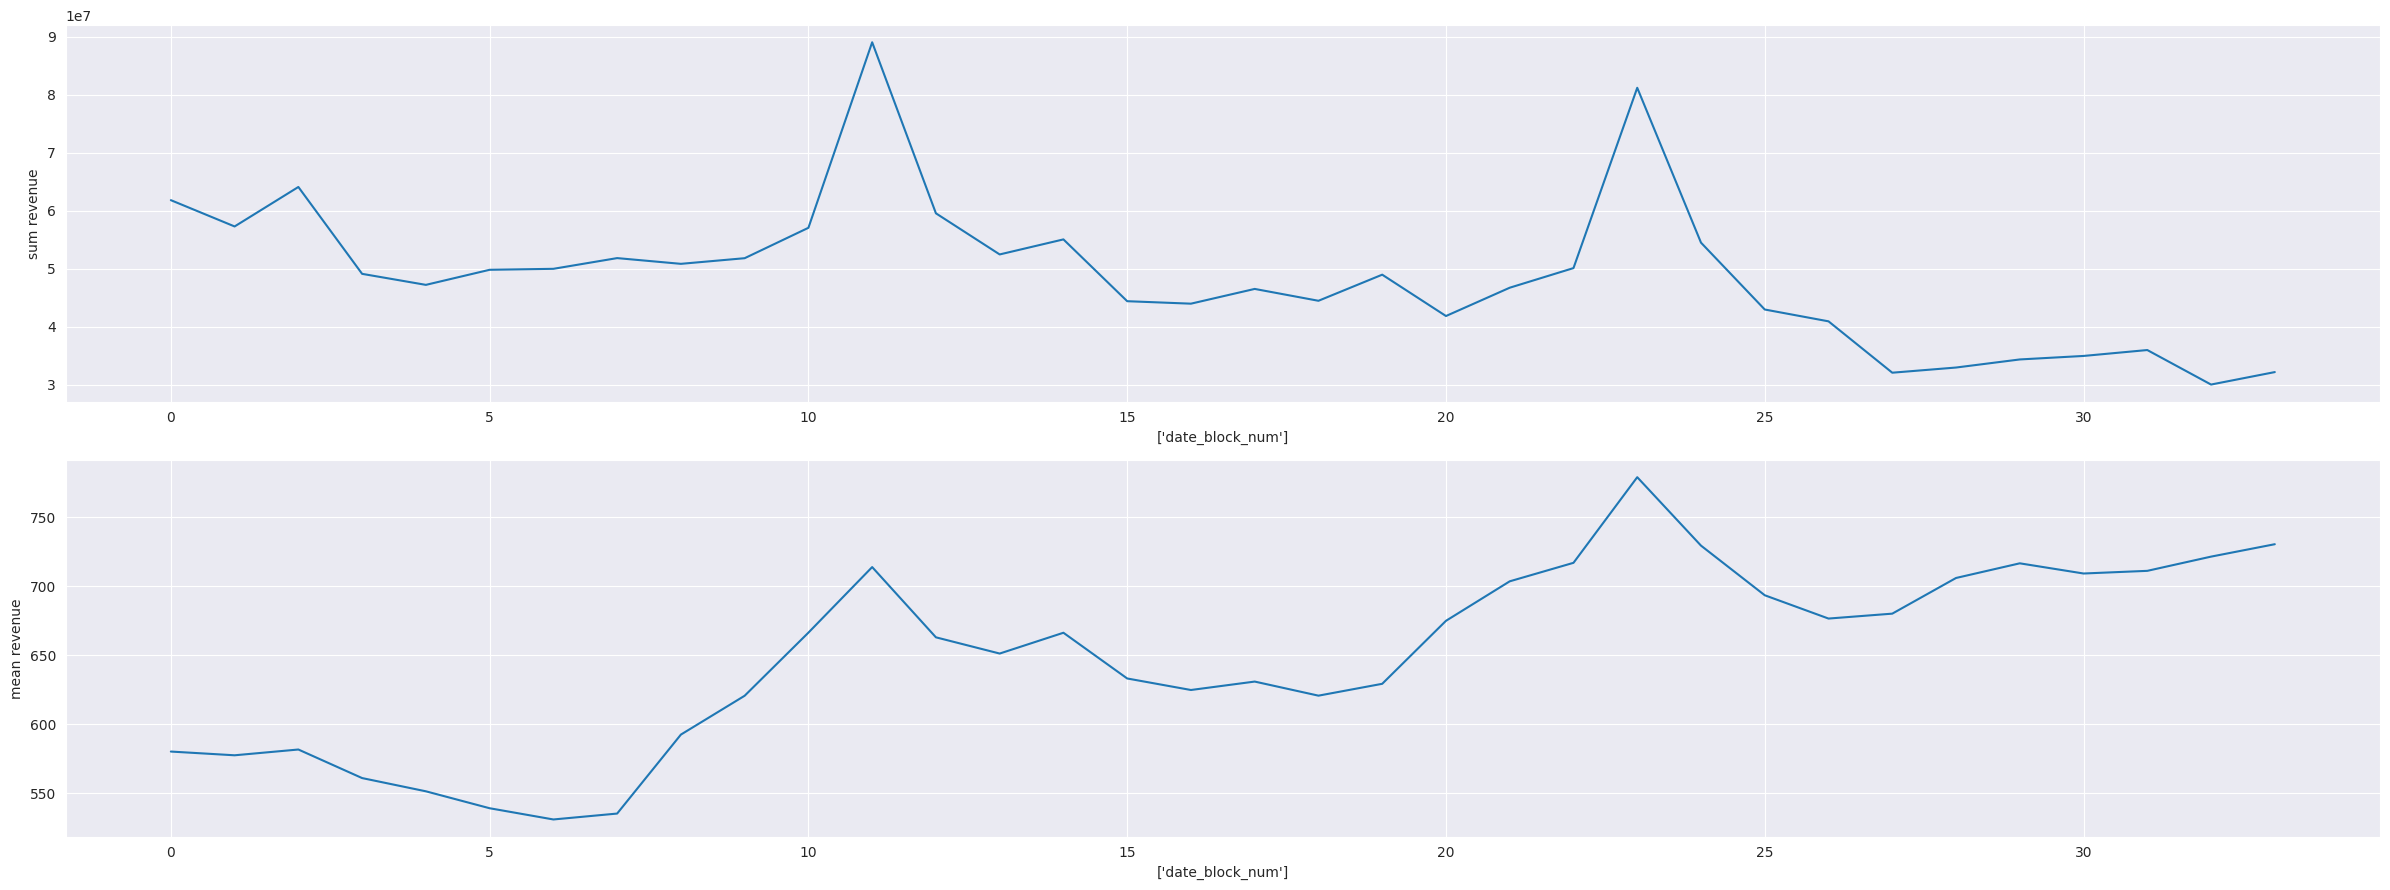

In [7]:
lineplots(data=sales, group_column=['date_block_num'], agg_column='revenue',
          x='date_block_num', y='revenue', agg_func=['sum', 'mean'])

<font size = 3>

**We can see that sum revenue for all shops per month decreasing, but mean revenue is increasing, this may mean that average item price increase over time. Also, we can see some seasonality, for every 11 months, the revenue is maximum**


</font>

<font size = 3>

**Distribution of the sum sold item for each month:**


</font>

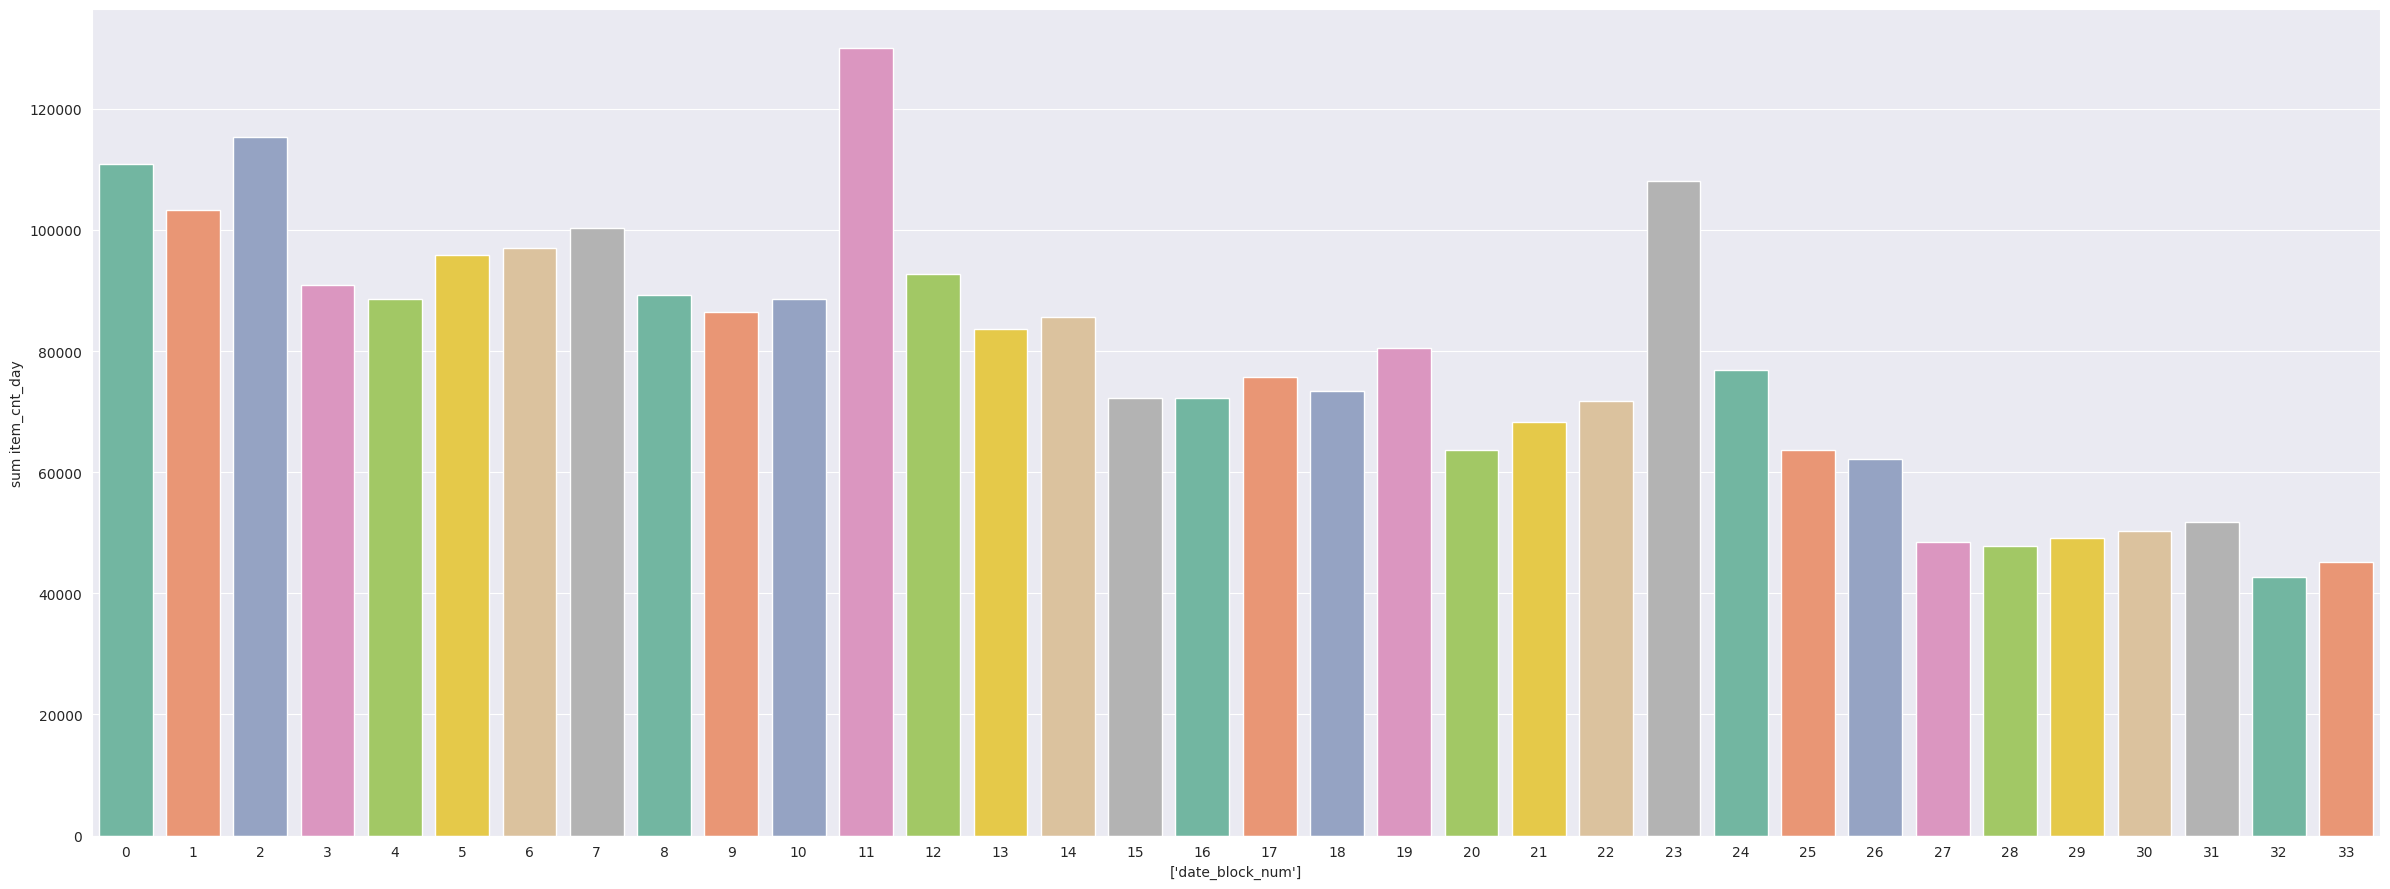

In [8]:
barplots(data=sales, group_column=['date_block_num'], agg_column='item_cnt_day',
         x='date_block_num', y='item_cnt_day', agg_func=['sum'])

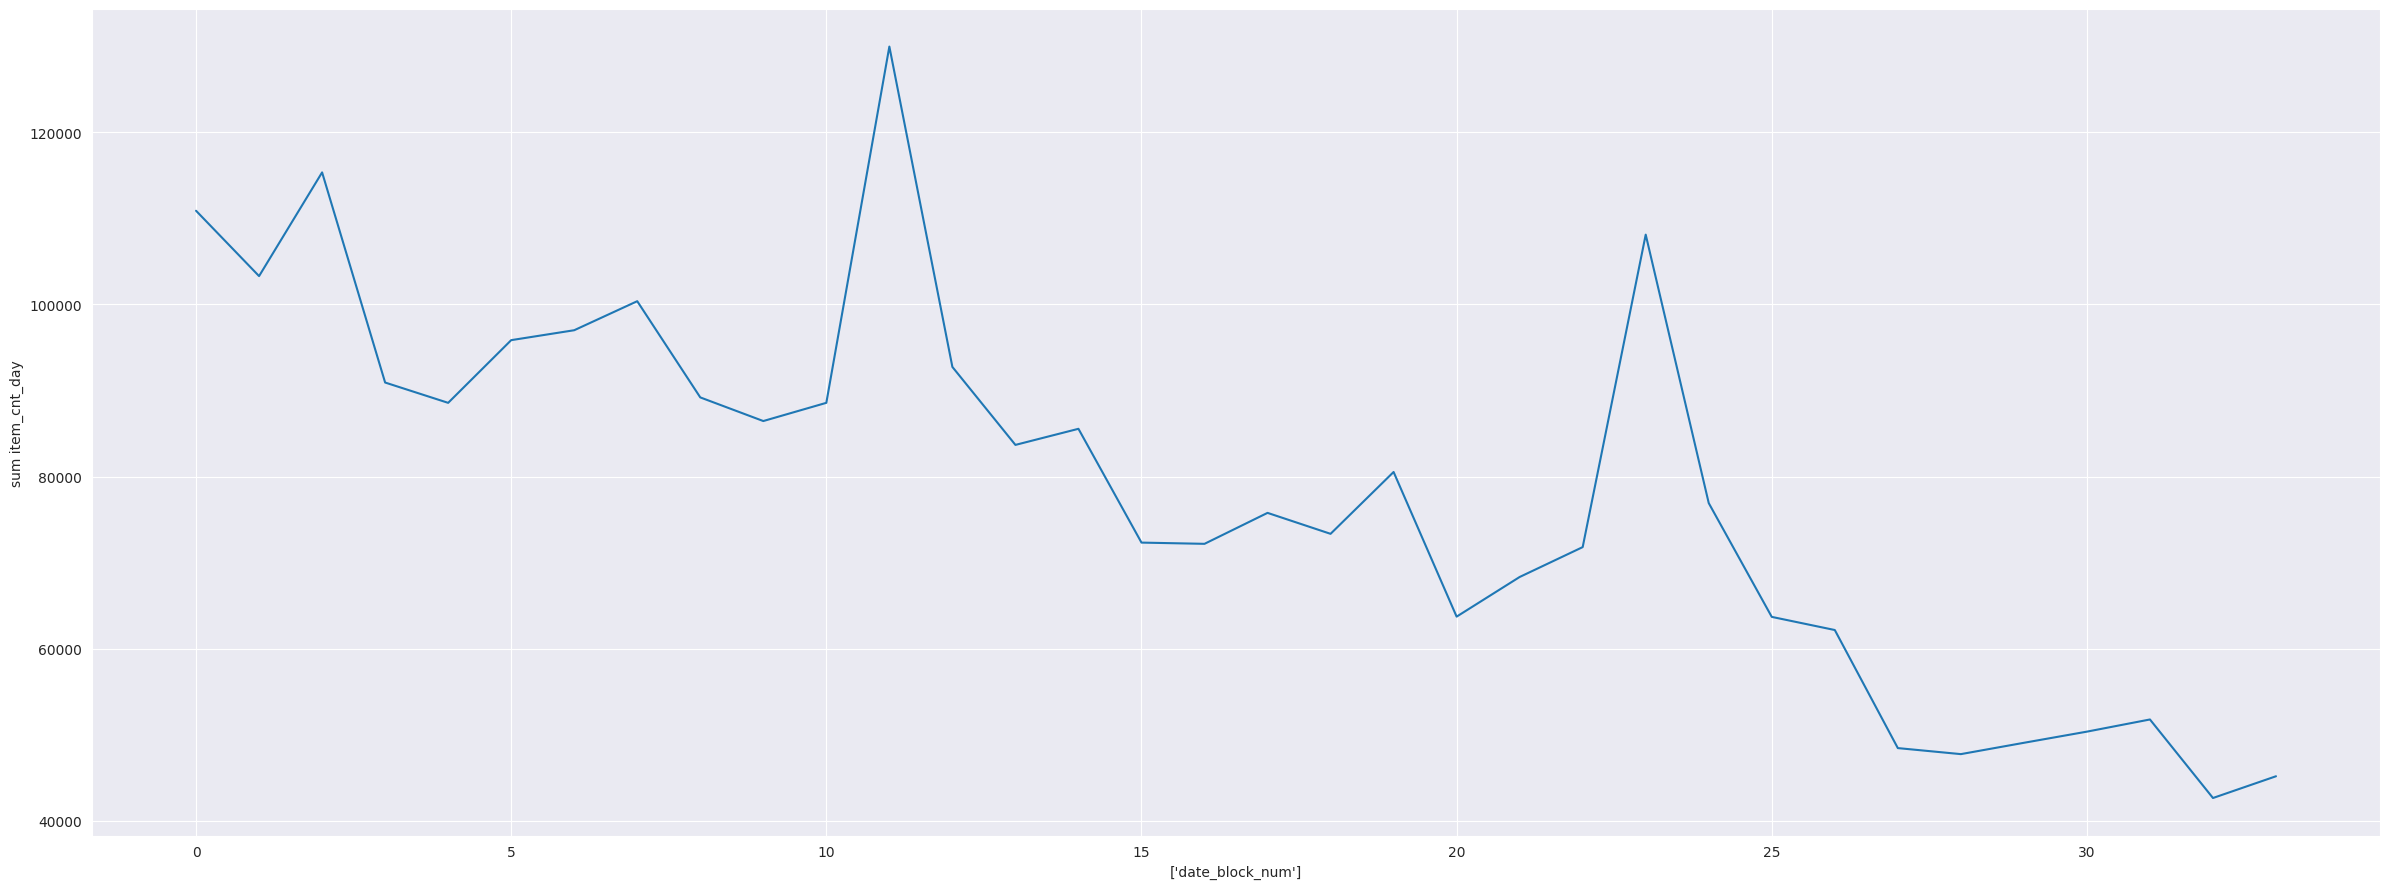

In [9]:
lineplots(data=sales, group_column=['date_block_num'], agg_column='item_cnt_day',
          x='date_block_num', y='item_cnt_day', agg_func=['sum'])

<font size = 3>

**According to this distribution, can see that sum of sold items for each moth decreasing trough time. Also, can see some seasonality and negative trend**


</font>

<font size = 3>

**Distribution sum of sold items for each year:**


</font>

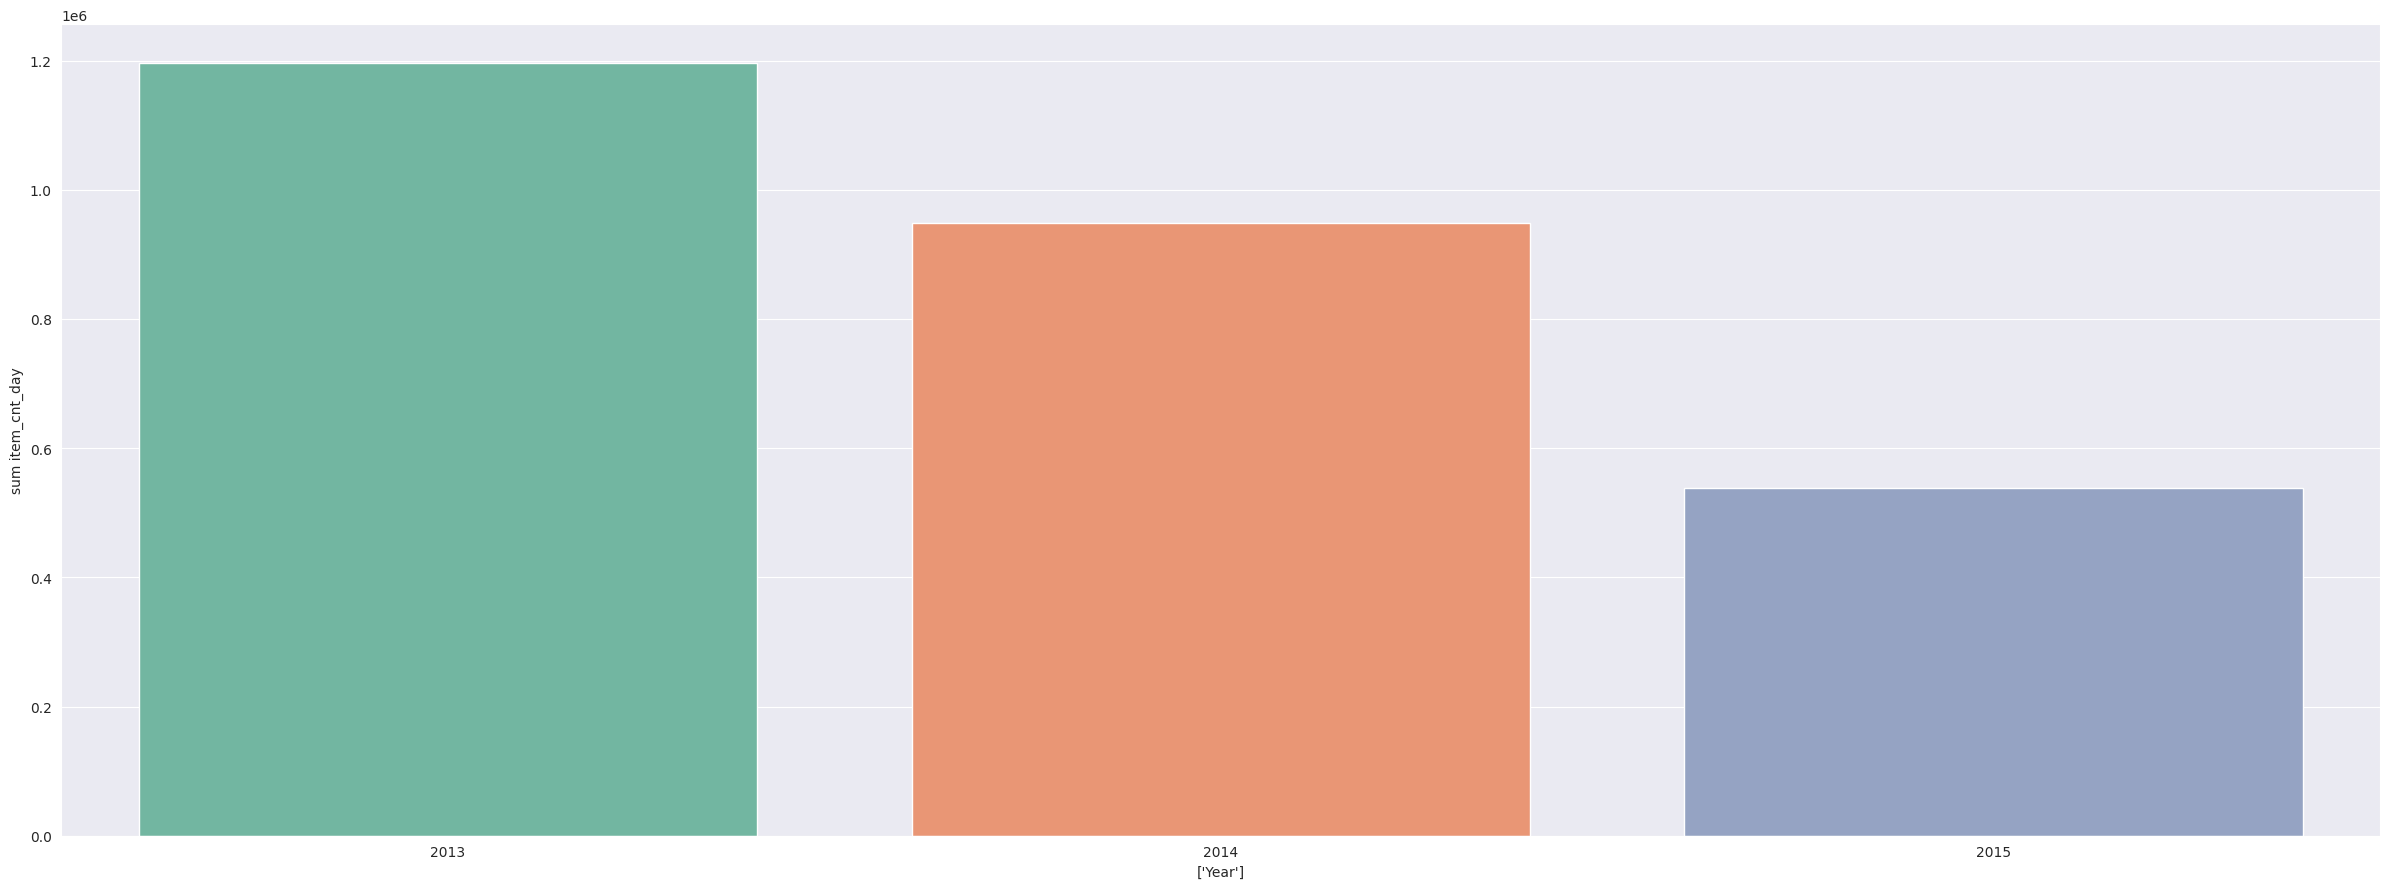

In [10]:
barplots(data=sales, group_column=['Year'], agg_column='item_cnt_day',
         x='Year', y='item_cnt_day', agg_func=['sum'])

<font size = 3>

**As in the previous chart, may notice that number of sold items decreasing**


</font>

<font size = 3>

**Distribution sum of sold items trough month:**


</font>

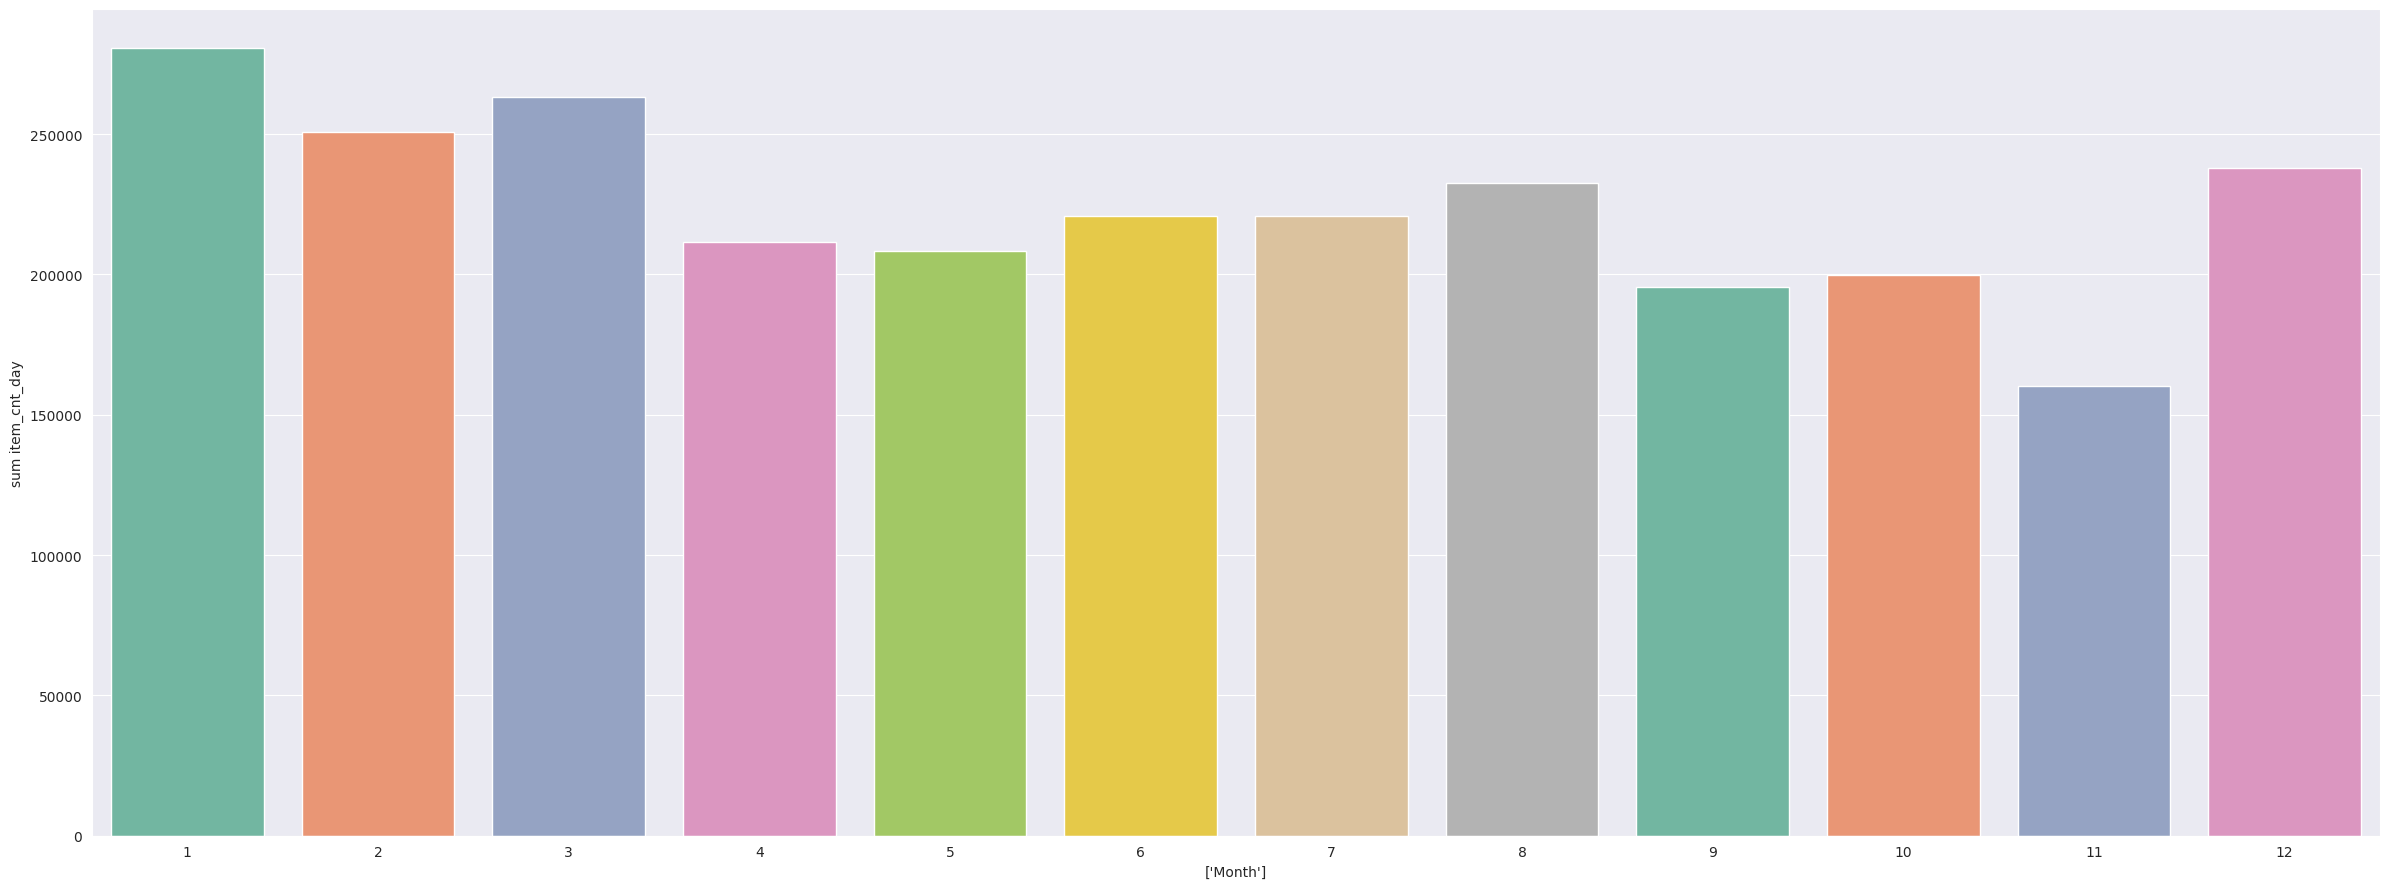

In [11]:
barplots(data=sales, group_column=['Month'], agg_column='item_cnt_day',
         x='Month', y='item_cnt_day', agg_func=['sum'])

<font size = 3>

**May notice that the 1,3 and 12 month of the year more profitable of the year**

</font>

<font size = 3>

**Distribution sum of sold items for every day in month:**

</font>

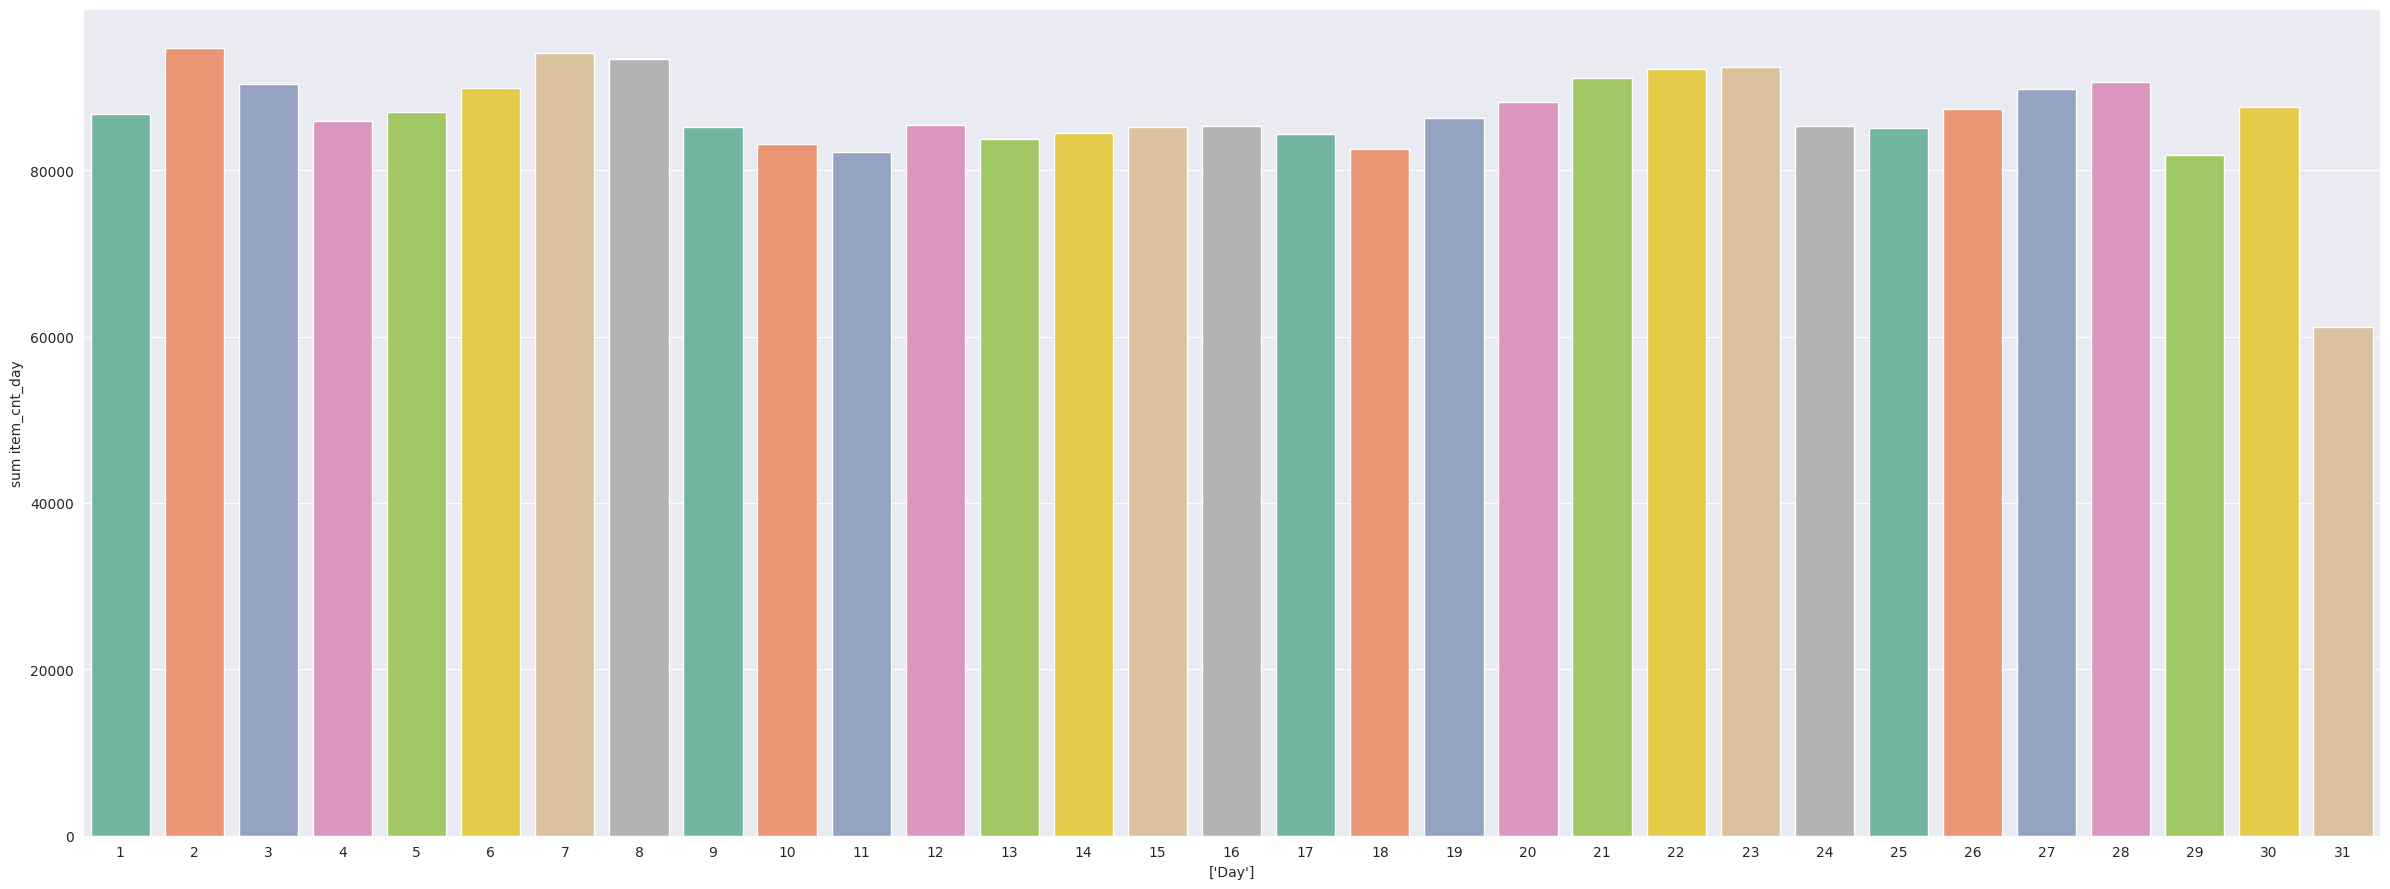

In [12]:
barplots(data=sales, group_column=['Day'], agg_column='item_cnt_day',
         x='Day', y='item_cnt_day', agg_func=['sum'])

<font size = 3>

**Line plots for distributions of revenue trough Year, Month and Day:**

</font>

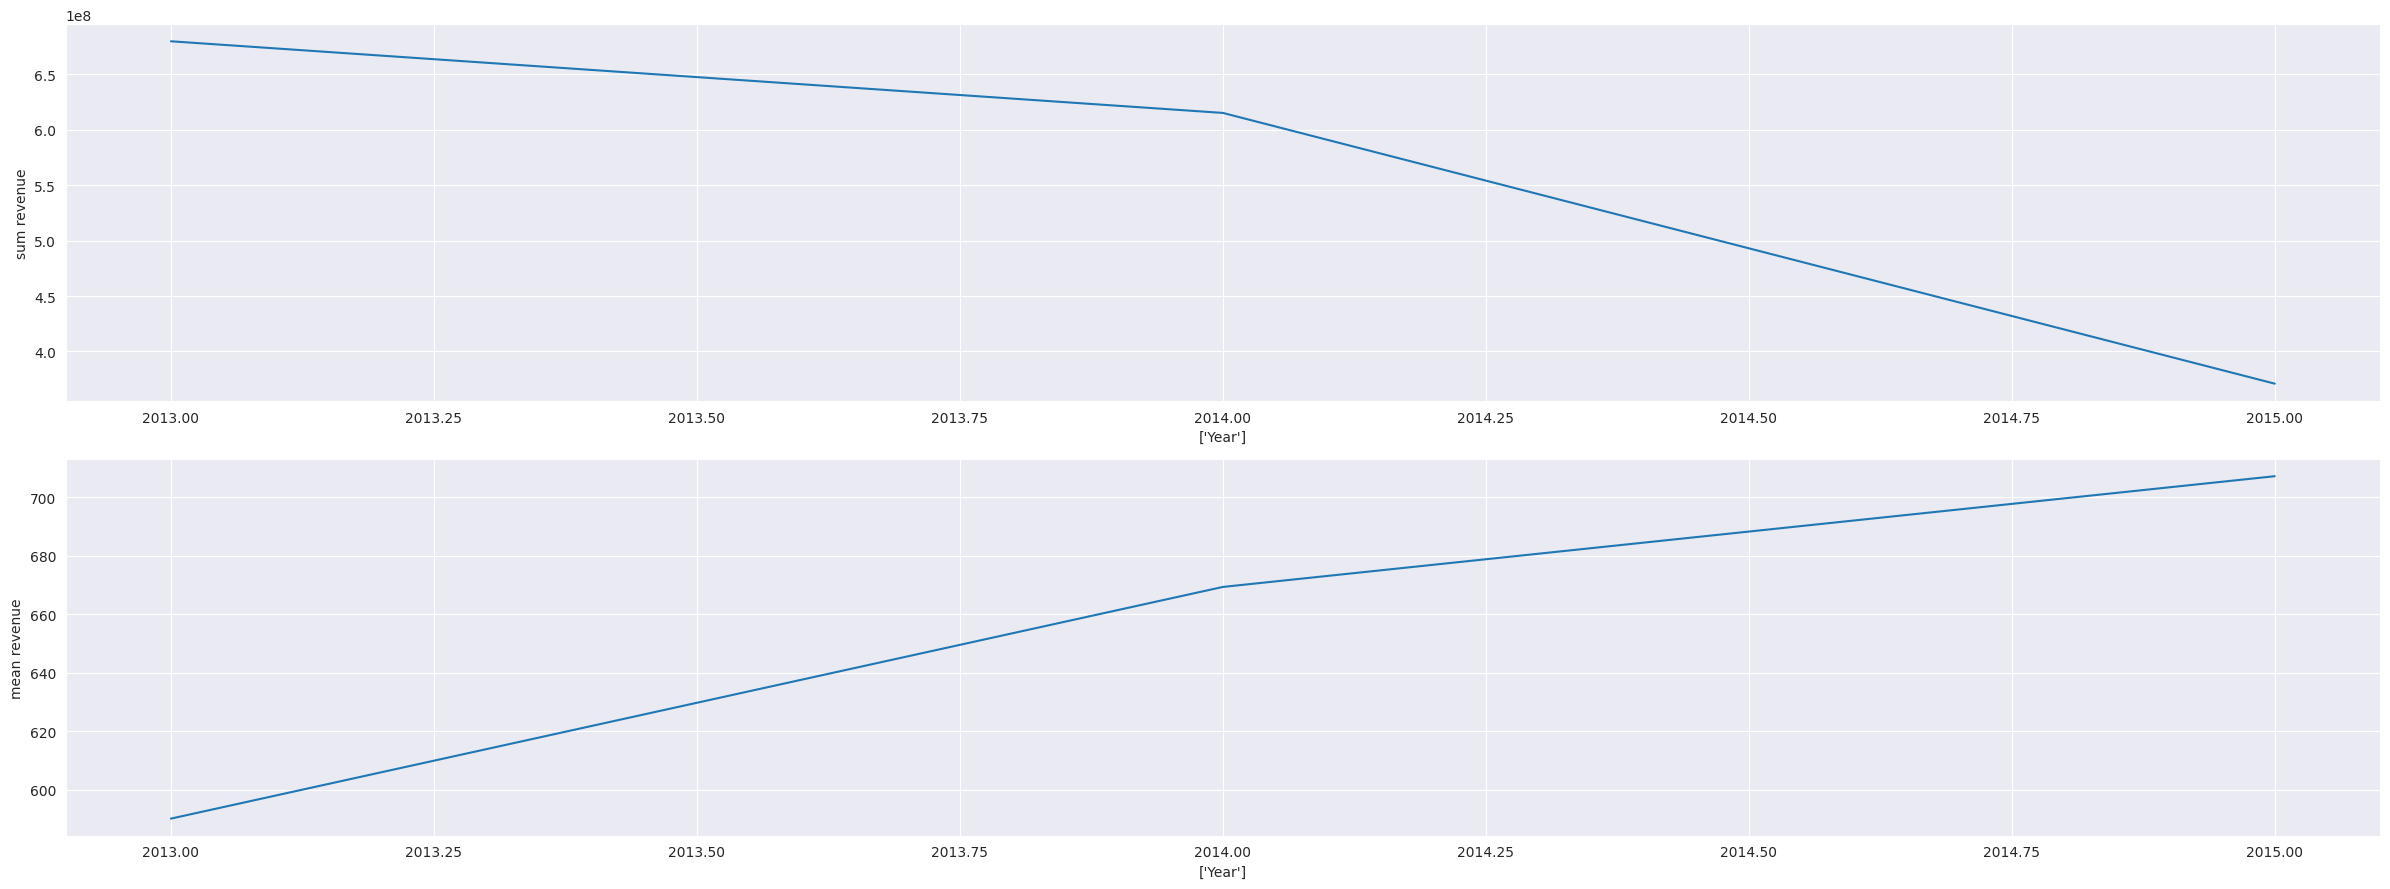

In [13]:
lineplots(data=sales, group_column=['Year'], agg_column='revenue',
          x='Year', y='revenue', agg_func=['sum', 'mean'])

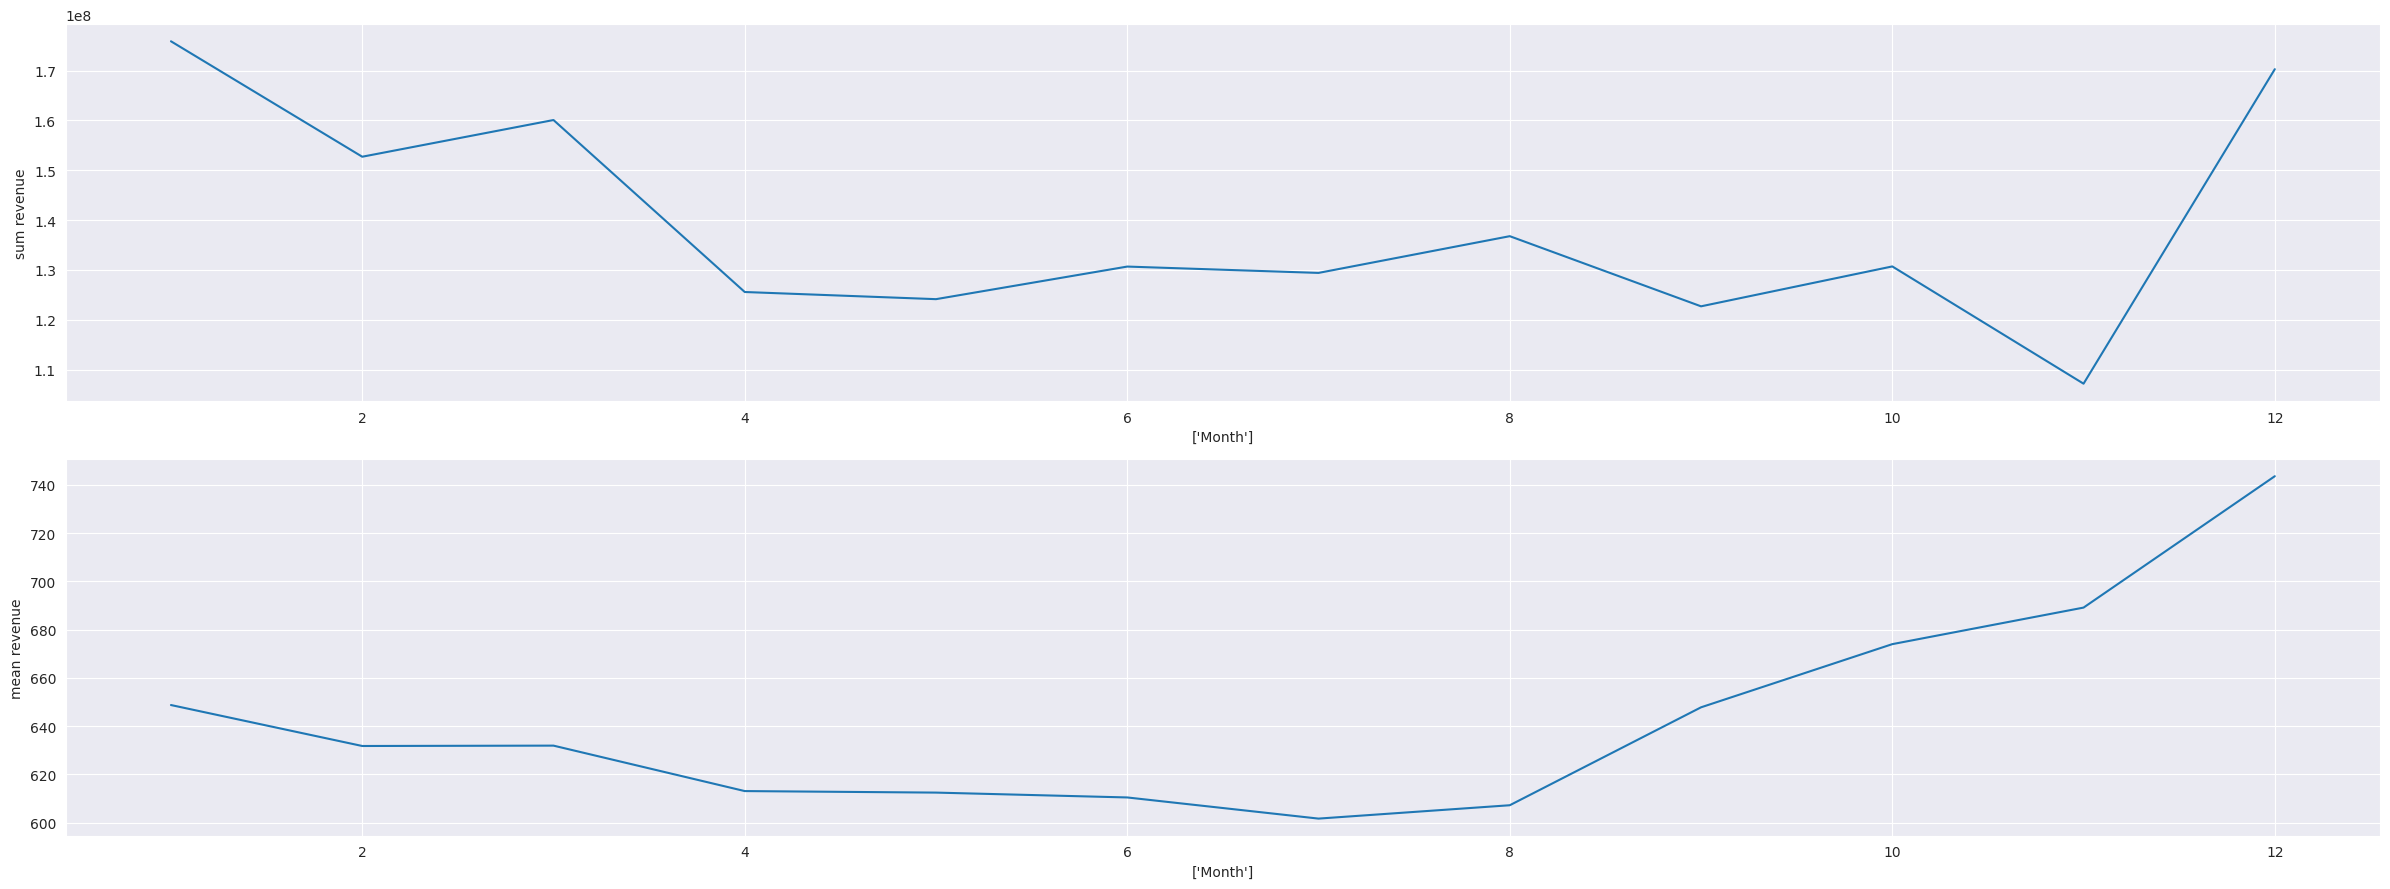

In [14]:
lineplots(data=sales, group_column=['Month'], agg_column='revenue',
          x='Month', y='revenue', agg_func=['sum', 'mean'])

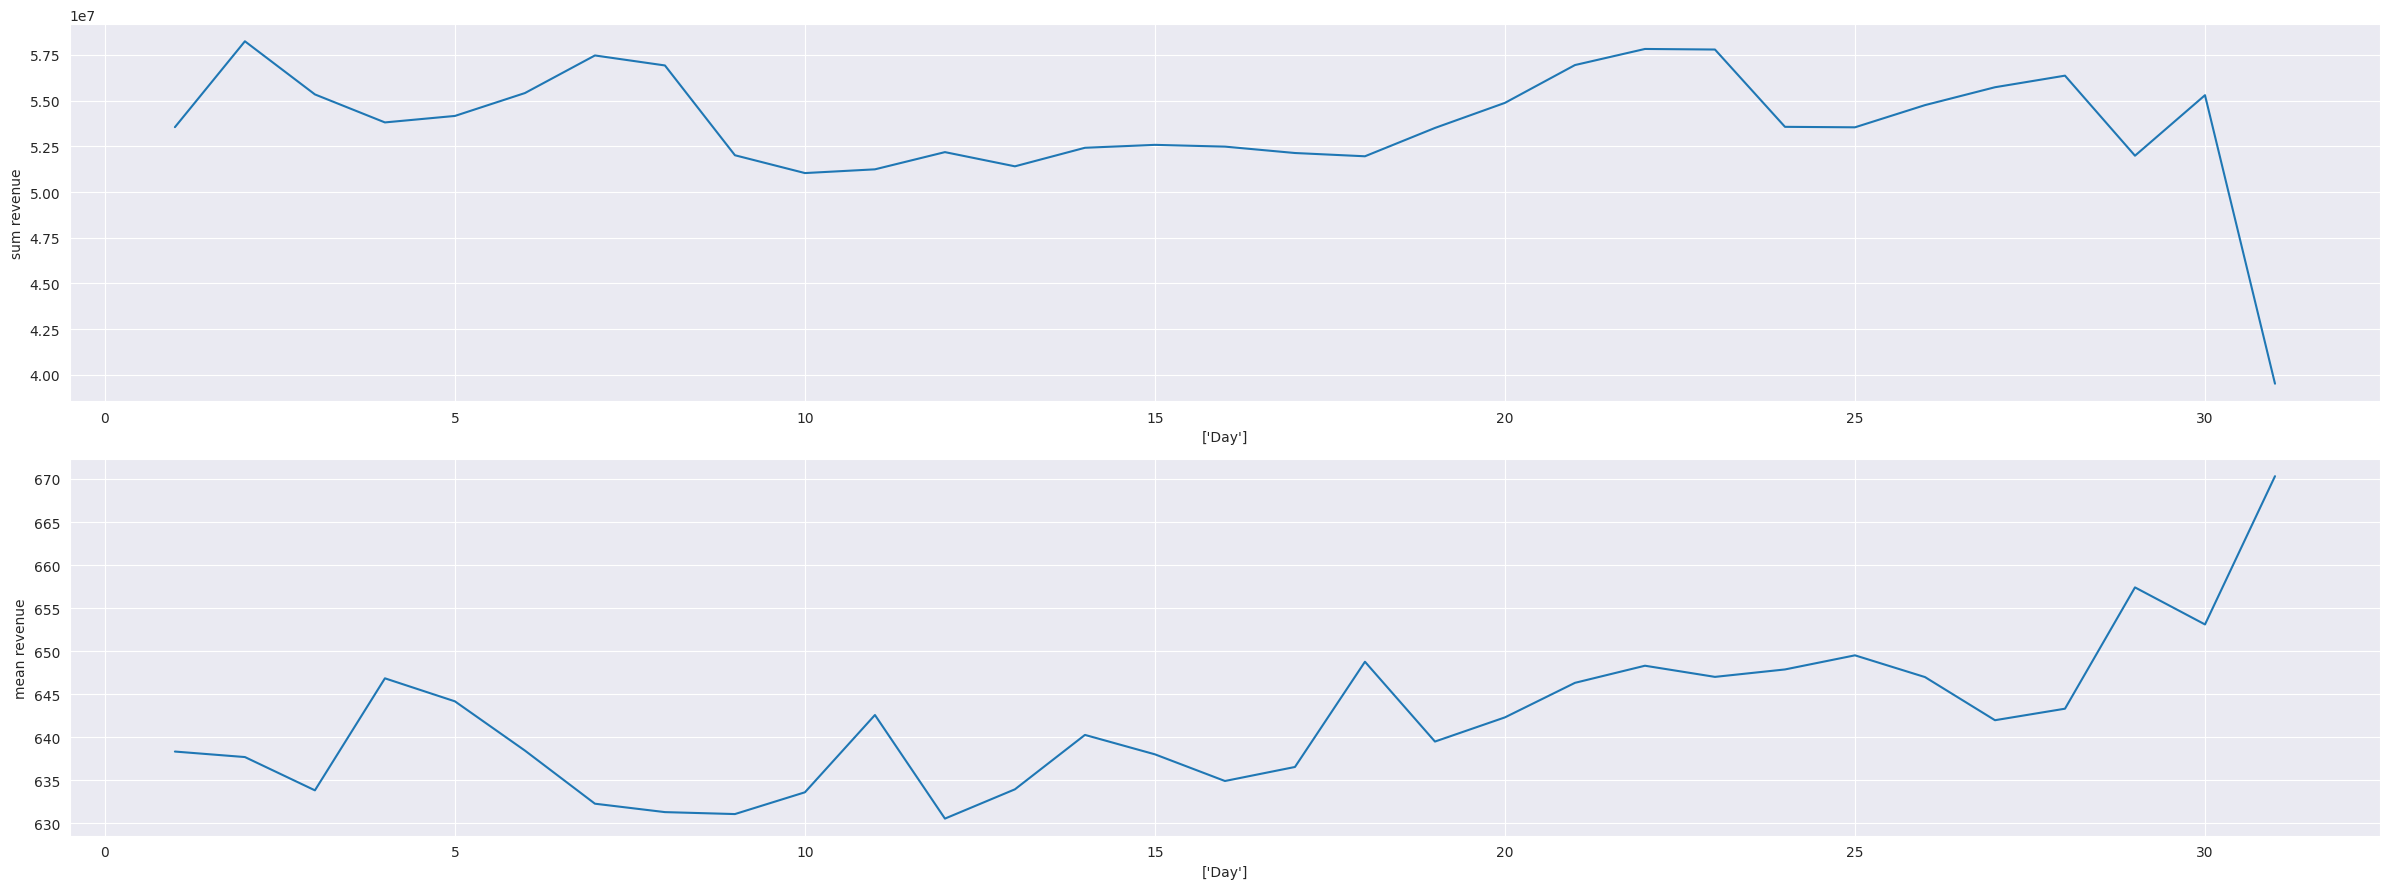

In [15]:
lineplots(data=sales, group_column=['Day'], agg_column='revenue',
          x='Day', y='revenue', agg_func=['sum', 'mean'])

<font size = 3>

**As previously, can see that sum of revenue decreasing trough Year, The most profitable month of year is the las month. The mean price of items is increasing trough year**

</font>

<font size = 3>

**Make distribution with hue:**

</font>

In [16]:
grouping_sales = sales.groupby('date', as_index=False)['item_cnt_day'].sum()

In [17]:
grouping_sales['weekday_name'] = grouping_sales['date'].dt.day_name()
grouping_sales['month_name'] = grouping_sales['date'].dt.month_name()
grouping_sales['year'] = grouping_sales['date'].dt.year.astype('string')

<font size = 3>

**Distribution of every day in week trough years:**

</font>

<Axes: xlabel='weekday_name', ylabel='item_cnt_day'>

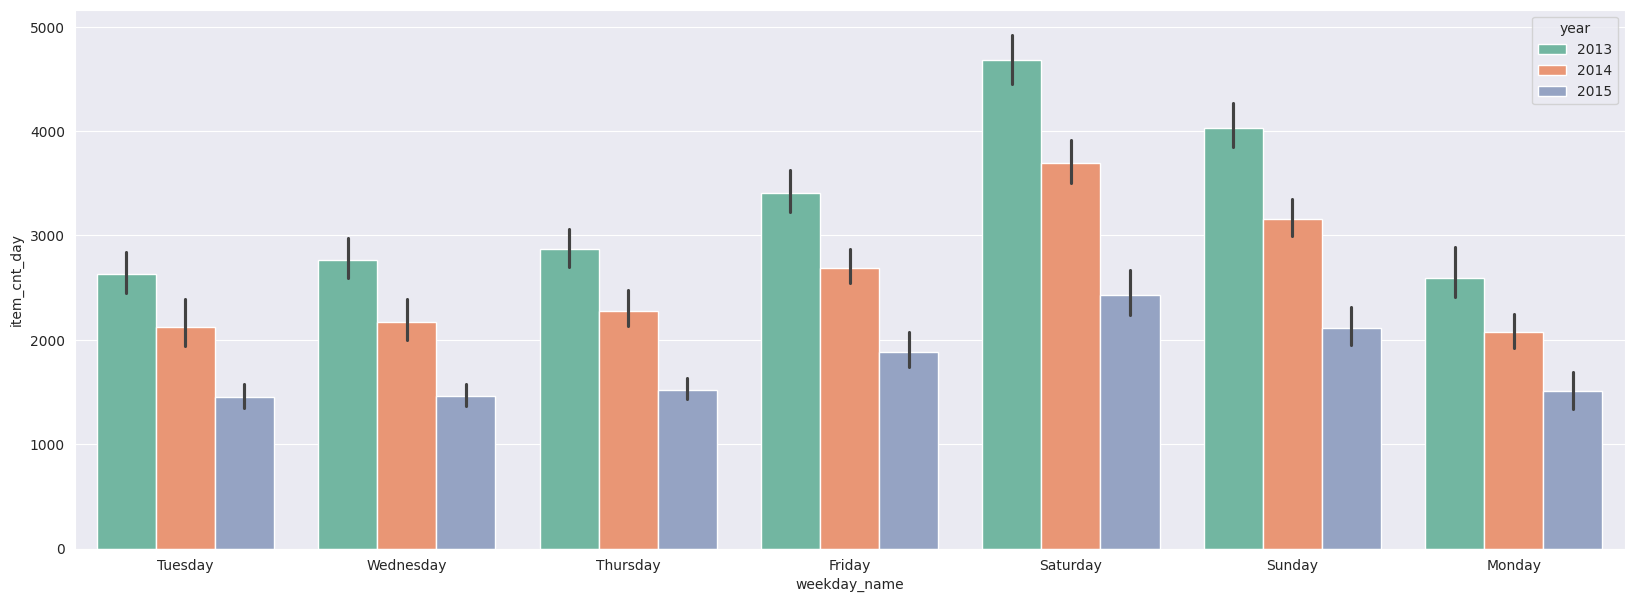

In [18]:
_, axes = plt.subplots(1, 1, figsize=(20, 7))
sns.barplot(data=grouping_sales, x='weekday_name', y='item_cnt_day', hue='year', palette='Set2', ax=axes)

<font size = 3>

**May see that Saturday the most profitable day in week, also can see that number of sod item through year decrease**

</font>

<font size = 3>

**Distribution of every day in week through every month in year**

</font>

<Axes: xlabel='weekday_name', ylabel='item_cnt_day'>

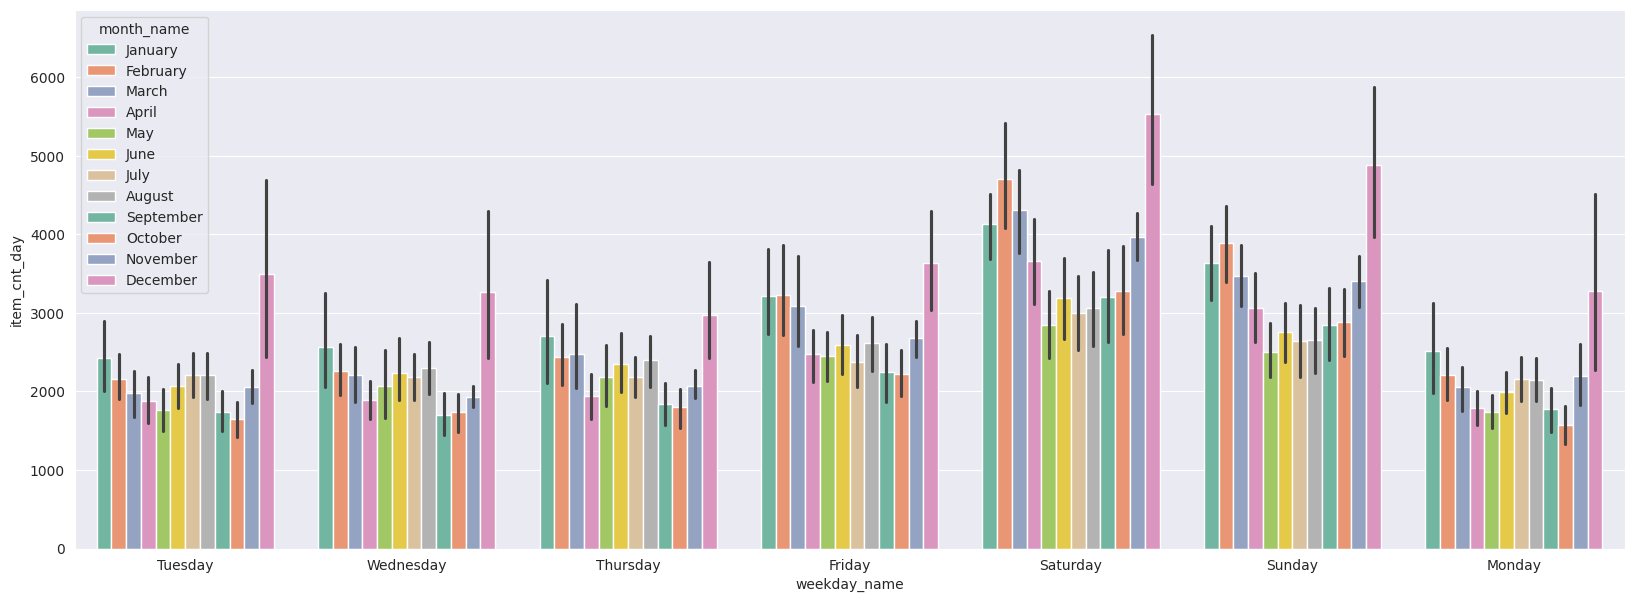

In [19]:
_, axes = plt.subplots(1, 1, figsize=(20, 7))
sns.barplot(data=grouping_sales, x='weekday_name', y='item_cnt_day', hue='month_name', palette='Set2', ax=axes)

<font size = 3>

**The most profitable month in year is december the next two month  is january and february**

</font>

In [20]:
del grouping_sales

In [21]:
grouping_sales = sales.groupby([sales['date'], 'shop_id'], as_index=False)['item_cnt_day'].sum()

In [22]:
grouping_sales['weekday_name'] = grouping_sales['date'].dt.day_name()
grouping_sales['month_name'] = grouping_sales['date'].dt.month_name()
grouping_sales['year'] = grouping_sales['date'].dt.year.astype('string')

<font size = 3>

**Distribution of sum of sold items for every shops through years:**

</font>

<Axes: xlabel='shop_id', ylabel='item_cnt_day'>

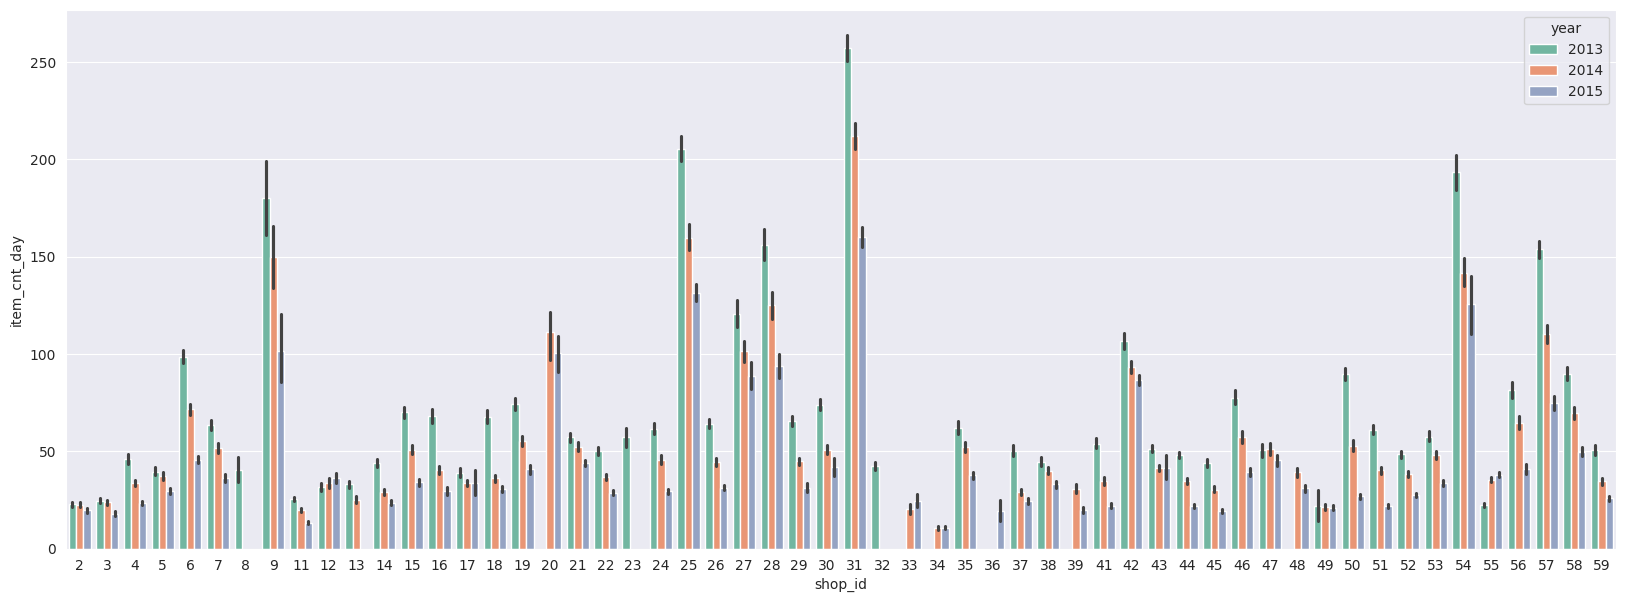

In [23]:
_, axes = plt.subplots(1, 1, figsize=(20, 7))
sns.barplot(data=grouping_sales, x='shop_id', y='item_cnt_day', hue='year', palette='Set2', ax=axes)

<font size = 3>

**According to this graphic, can see that the most active shop is the shop with 31 id. Also may notice that not all shops have sales in some years. For example the shop with 8 id has no sales in 2014 and 2015, or for example shop 33 that has no sales in 2013. Also can see that number for sold items decreasing through year**

</font>

<font size = 3>

**Time series analysis:**

</font>

In [24]:
del grouping_sales

In [25]:
grouping_sales = sales.groupby(['date_block_num', 'shop_id'], as_index=False)['item_cnt_day'].sum()

In [26]:
grouping_sales

,date_block_num,shop_id,item_cnt_day
0,0,2,999.0
1,0,3,750.0
2,0,4,1829.0
3,0,6,3128.0
4,0,7,2223.0
...,...,...,...
1566,33,55,1183.0
1567,33,56,1012.0
1568,33,57,1867.0
1569,33,58,1166.0


Results of Dickey-Fuller Test:
Test Statistic                   -4.151426
p-value                           0.000795
#Lags Used                       23.000000
Number of Observations Used    1547.000000
Critical Value (1%)              -3.434584
Critical Value (5%)              -2.863410
Critical Value (10%)             -2.567766
dtype: float64
Results of KPSS Test:
Test Statistic            4.541073
p-value                   0.010000
#Lags Used               18.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


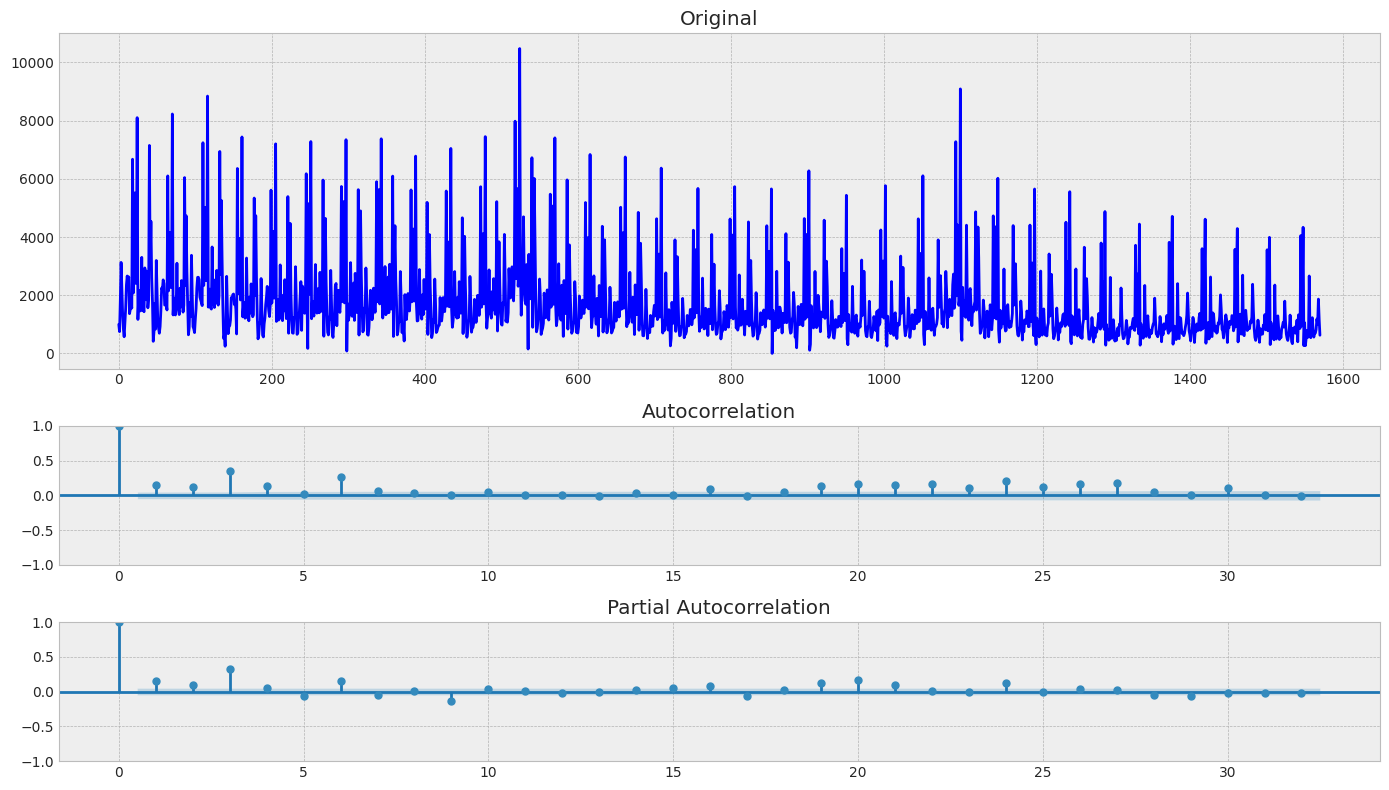

In [27]:
tsplot(grouping_sales['item_cnt_day'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

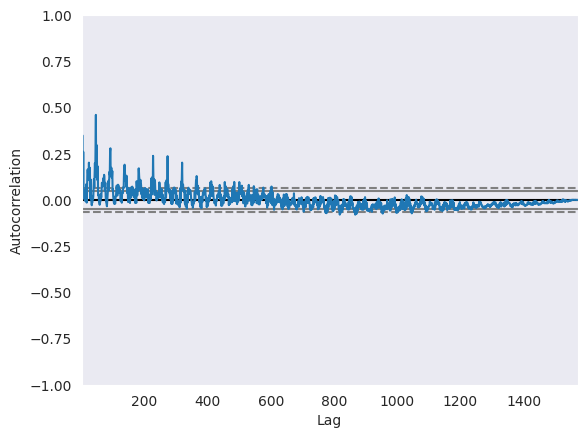

In [28]:
autocorrelation_plot(grouping_sales['item_cnt_day'])

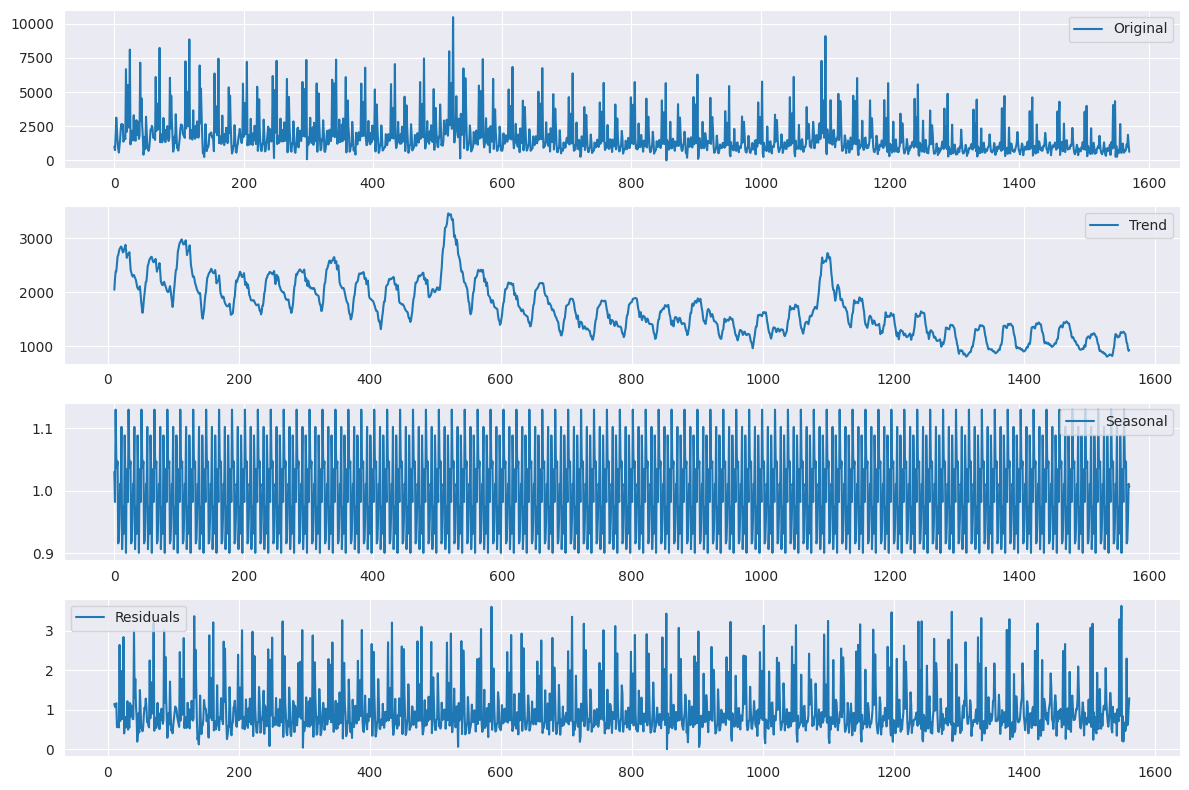

In [29]:
series_decompose(grouping_sales['item_cnt_day'], period=20)

Results of Dickey-Fuller Test:
Test Statistic                   -3.297928
p-value                           0.014971
#Lags Used                       24.000000
Number of Observations Used    1546.000000
Critical Value (1%)              -3.434587
Critical Value (5%)              -2.863411
Critical Value (10%)             -2.567766
dtype: float64
Results of KPSS Test:
Test Statistic            5.123555
p-value                   0.010000
#Lags Used               19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


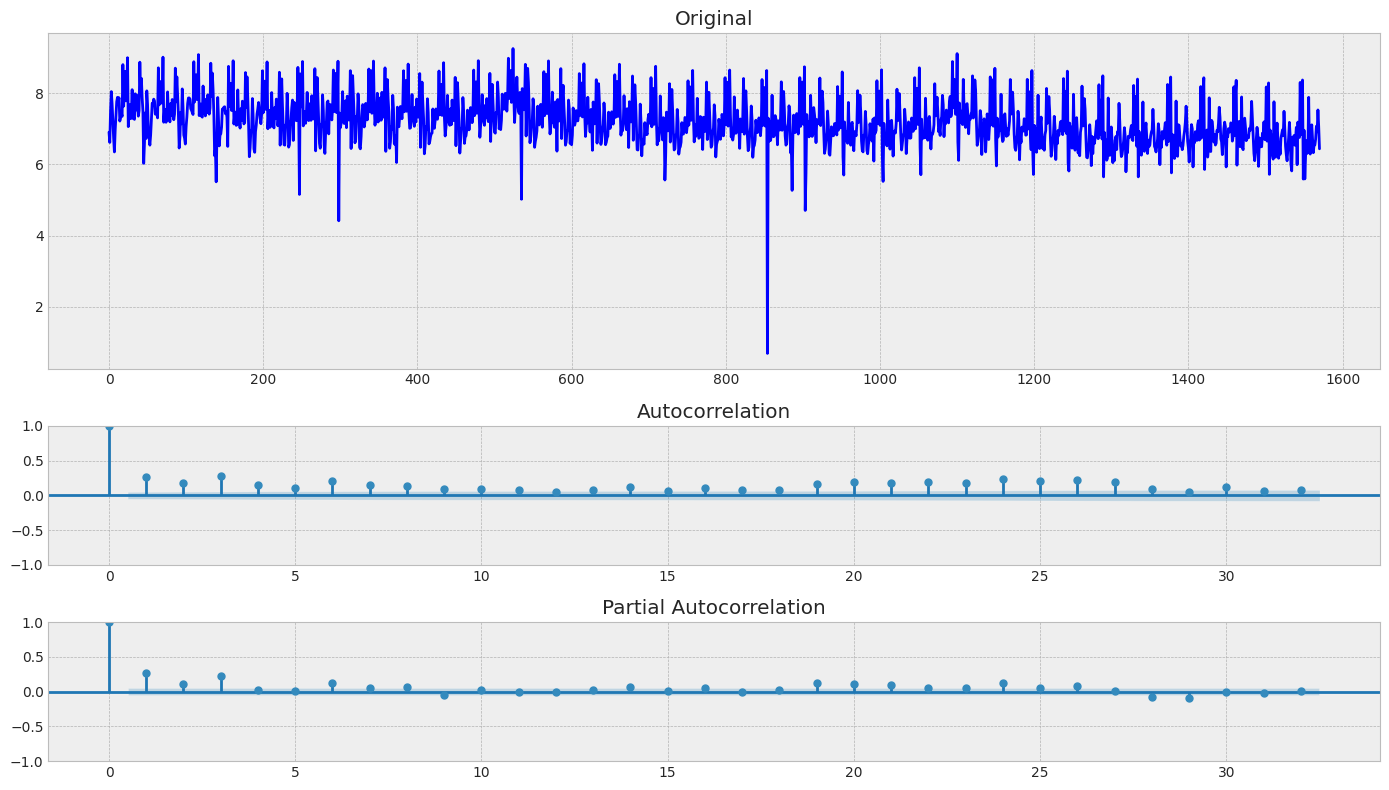

In [30]:
tsplot(np.log(grouping_sales['item_cnt_day']))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

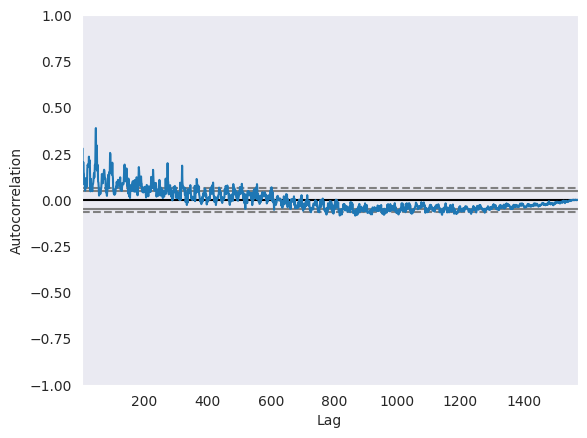

In [31]:
autocorrelation_plot(np.log(grouping_sales['item_cnt_day']))

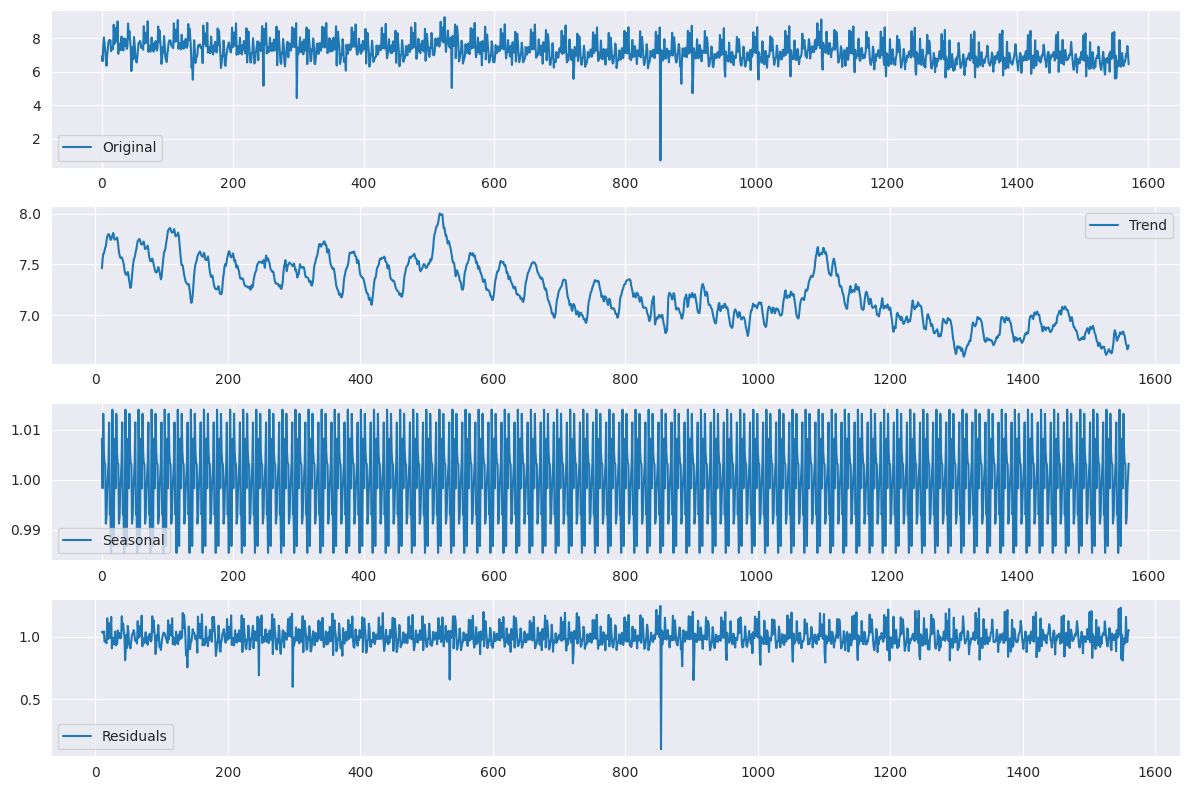

In [32]:
series_decompose(np.log(grouping_sales['item_cnt_day']), period=20)

Results of Dickey-Fuller Test:
Test Statistic                -1.573835e+01
p-value                        1.264703e-28
#Lags Used                     2.400000e+01
Number of Observations Used    1.546000e+03
Critical Value (1%)           -3.434587e+00
Critical Value (5%)           -2.863411e+00
Critical Value (10%)          -2.567766e+00
dtype: float64
Results of KPSS Test:
Test Statistic            0.025801
p-value                   0.100000
#Lags Used               58.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


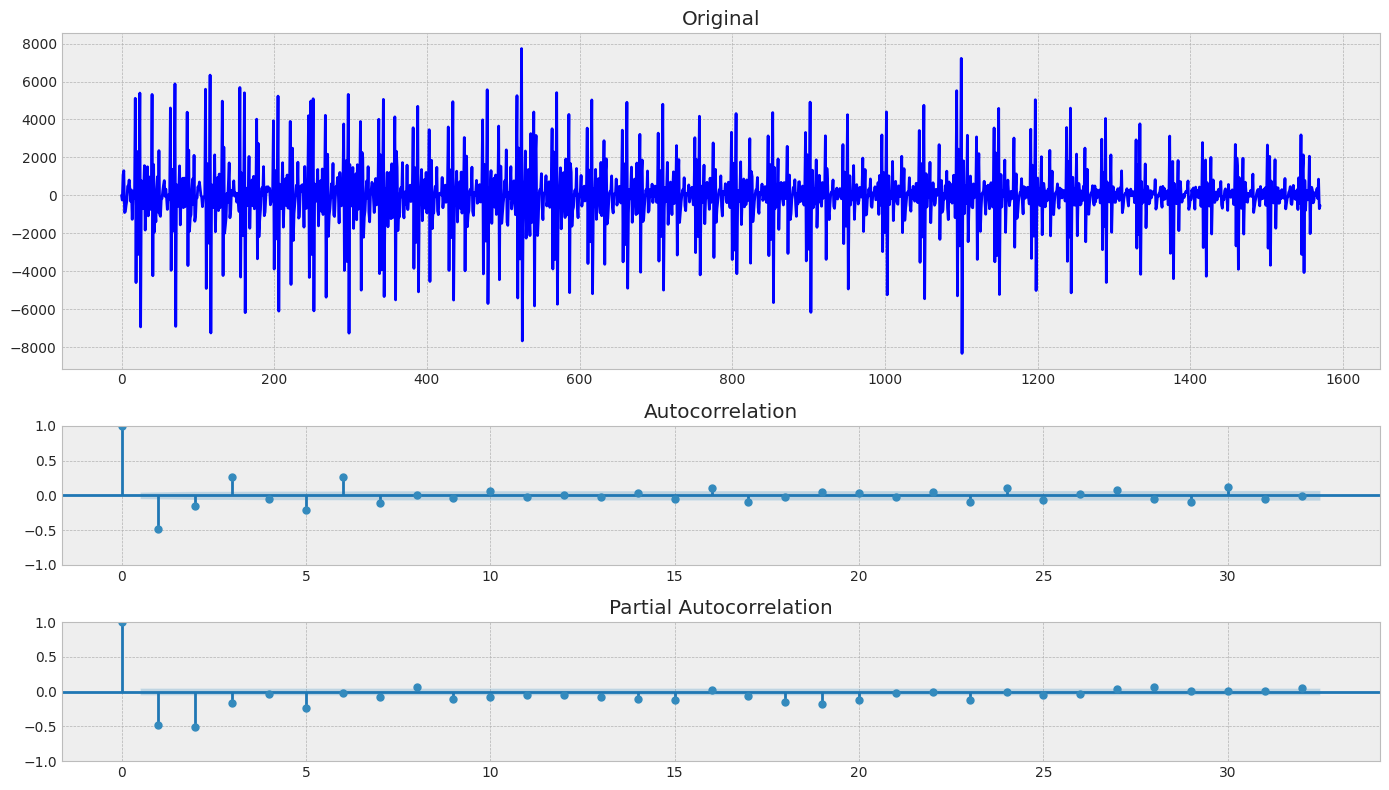

In [33]:
item_cnt_day_diff = np.diff(grouping_sales['item_cnt_day'], 1)
grouping_sales['item_cnt_day_diff'] = np.append(0, item_cnt_day_diff)
tsplot(grouping_sales['item_cnt_day_diff'])

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

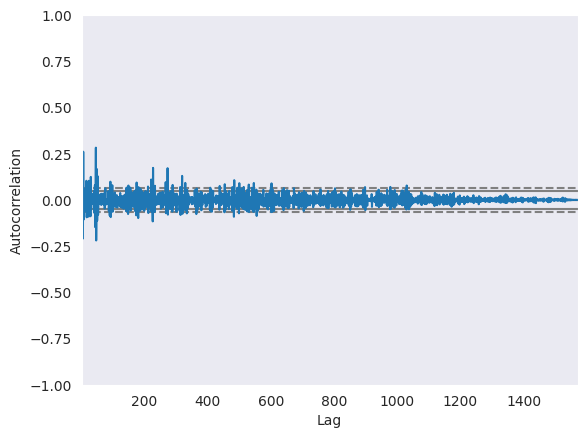

In [34]:
autocorrelation_plot(grouping_sales['item_cnt_day_diff'])

In [35]:
del grouping_sales, sales

<font size = 3>

**According to time series analysis, we can do some conclusions. Our time series is stationary, but it has a lot of noise. We can see some trend and seasonality. It may be a good reason to use some of SARIMA models to forecast this series.**

</font>